In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.layers import Dense, Input,  Conv2D, MaxPooling2D, UpSampling2D, Lambda, Layer, Lambda

Using TensorFlow backend.


In [3]:
%matplotlib inline

# pca vs t-sne

In [4]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
pca = PCA(2)  # project from 64 to 2 dimensions
pca_projected = pca.fit_transform(digits.data)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print(digits.data.shape)
print(pca_projected.shape)

explained variance ratio (first two components): [ 0.14890594  0.13618771]
(1797, 64)
(1797, 2)


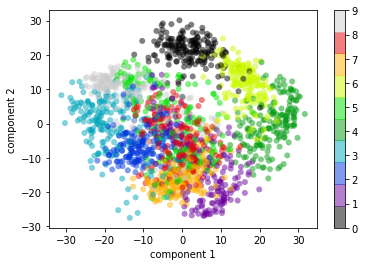

In [6]:
plt.scatter(pca_projected[:, 0], pca_projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [7]:
print (pca_projected.shape)
pca_projected

(1797, 2)


array([[ -1.25946599,  21.27488165],
       [  7.95761305, -20.76870114],
       [  6.99192146,  -9.95598454],
       ..., 
       [ 10.80128246,  -6.96025245],
       [ -4.8720983 ,  12.4239503 ],
       [ -0.34439224,   6.36555236]])

In [8]:
tsne = TSNE(n_iter=1500) # project from 64 to 2 dimensions
tsne_projected = tsne.fit_transform(digits.data)
print(digits.data.shape)
print(tsne_projected.shape)

(1797, 64)
(1797, 2)


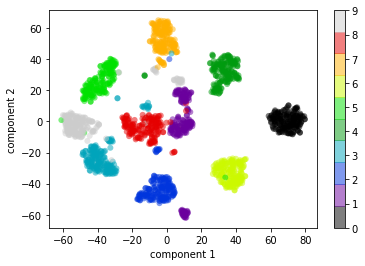

In [9]:
plt.scatter(tsne_projected[:, 0], tsne_projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# mnist - pca vs autoencoder

In [10]:
np.random.seed(1337)  # for reproducibility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [11]:
# data pre-processing(# minmax_normalized)
x_train = x_train.astype('float32') / 255. - 0.5       
x_test = x_test.astype('float32') / 255. - 0.5  
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [12]:
print (np.max(x_test))
print (np.min(x_test))

0.5
-0.5


In [13]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## pca

In [14]:
pca = PCA(2)  # project from 64 to 2 dimensions
pca_projected = pca.fit_transform(x_train)
print(x_train.shape)
print(pca_projected.shape)

(60000, 784)
(60000, 2)


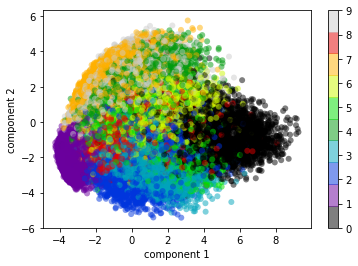

In [15]:
plt.scatter(pca_projected[:, 0], pca_projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [16]:
mnist_pca_projected = pca.transform(x_test)
print(x_test.shape)
print(mnist_pca_projected.shape)

(10000, 784)
(10000, 2)


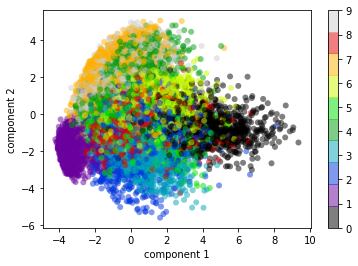

In [17]:
plt.scatter(mnist_pca_projected[:, 0], mnist_pca_projected[:, 1],
            c=y_test, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## autoencoder (pca version)

In [18]:
# 784維 -> 2維
# in order to plot in a 2D figure
encoding_dim = 2
# this is our input placeholder
input_img = Input(shape=(784,))

In [19]:
# to perform pca, we don't use activation function and the cost function is MSE
# encoder layers
encoder_output = Dense(encoding_dim)(input_img)
# decoder layers
decoded = Dense(784)(encoder_output)
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)

In [20]:
encoder = Model(inputs=input_img, outputs=encoder_output)

In [21]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [22]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.0896       - ETA: 14s - loss: 0.2270

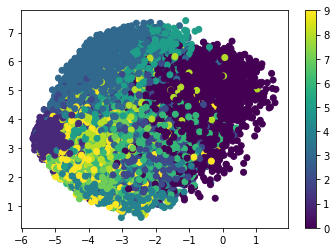

In [23]:
# plotting
encoded_imgs = encoder.predict(x_train)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_train)
plt.colorbar()
plt.show()

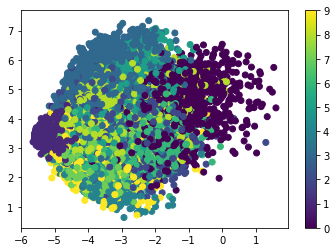

In [24]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()

# autoencoder

In [25]:
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

In [26]:
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)

In [27]:
# construct the encoder model for plotting
encoder = Model(inputs=input_img, outputs=encoder_output)

In [28]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [29]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.0702       

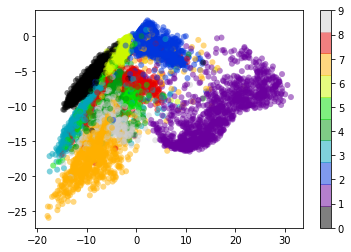

In [30]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar()
plt.show()

# Denoising Autoencoder 

In [64]:
x_train_denoising = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test_denoising = np.reshape(x_test, (len(x_test), 28, 28, 1))  #

noise_factor = 0.5
x_train_noisy = x_train_denoising + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_denoising.shape) 
x_test_noisy = x_test_denoising + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_denoising.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [65]:
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

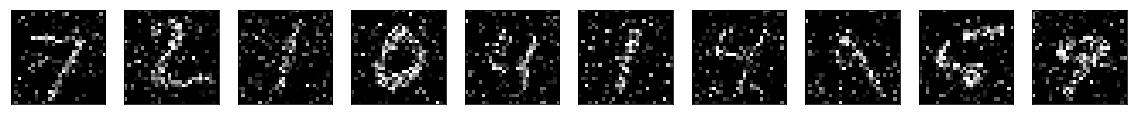

In [66]:
show_imgs(x_test_noisy) 

In [67]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [68]:
K.int_shape(decoded)

(None, 28, 28, 1)

In [ ]:
x_test_noisy.shape

(10000, 28, 28, 1)

In [ ]:
autoencoder.fit(x_train_noisy, x_train_denoising,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_denoising))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 125s - loss: -5.5687 - val_loss: -5.9232

In [ ]:
# denoising
print "denoising"
decoded_imgs = autoencoder.predict(x_test_noisy)
show_imgs(x_test_noisy, decoded_imgs)

# what if we feed the original noise-free test images?
print "\nof course, it works with original noise-less images"
decoded_imgs = autoencoder.predict(x_test_denoising)
show_imgs(x_test_denoising, decoded_imgs) # yes, it works well without noise!

# Variational Autoencoder

In [ ]:
batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

In [ ]:
x_train_vae = x_train
x_test_vae= x_test

In [ ]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [ ]:
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [ ]:
# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [ ]:
def vae_loss(x, x_decoded_mean):
    xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(xent_loss + kl_loss)

In [ ]:
vae = Model(x, x_decoded_mean)
vae.compile(loss=vae_loss, optimizer='rmsprop')

In [ ]:
vae.summary()

In [ ]:
vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size)


60000/60000 [==============================] - 12s - loss: -4750.9567    

In [ ]:
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

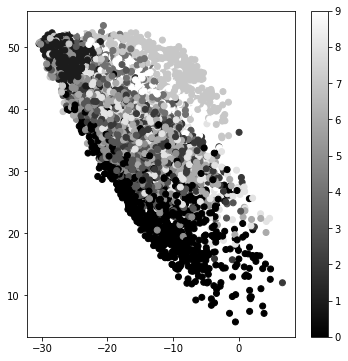

In [ ]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()